# Satellite Image Classification Demo

This notebook demonstrates how to use the satellite image classification utilities for comparing multiple pretrained models on satellite imagery.

## Setup and Import

In [1]:
from torchgeo_model_comparison import load_pretrained_models, classify_satellite_image, visualize_comparison

## Load Pretrained Models

In [2]:
print("Loading pretrained models...")
models = load_pretrained_models()

Loading pretrained models...


c:\Users\Dastan\anaconda3\envs\patching\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ Loaded ResNet50 for EuroSAT (10 land cover classes)


c:\Users\Dastan\anaconda3\envs\patching\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Dastan\anaconda3\envs\patching\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✓ Loaded ResNet18 modified for land cover (8 classes)
✓ Loaded ResNet18 with ImageNet weights


c:\Users\Dastan\anaconda3\envs\patching\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✓ Loaded ResNet50 with ImageNet weights
✓ Loaded ResNet18 for aerial imagery (12 classes)

Loaded 5 models successfully


## Classify Satellite Images

In [3]:
# Classify an image (example with a local satellite image)
image_path = "images/test_4.png"
print(f"\nClassifying image: {image_path}")
results = classify_satellite_image(models, image_path)

# Print summary of results
print(f"\nClassification completed!")
print(f"Models processed: {len(results)}")
for model_name, result in results.items():
    if 'error' not in result:
        top_prediction = result['predictions'][0]
        print(f"  {model_name}: {top_prediction['class']} ({top_prediction['confidence']:.3f})")
    else:
        print(f"  {model_name}: Error - {result['error']}")


Classifying image: images/test_4.png
✓ Loaded image: (1536, 1408)
✓ Classification completed for ResNet50_EuroSAT (10 classes)
✓ Classification completed for ResNet18_LandCover (8 classes)
✓ Classification completed for ResNet18_ImageNet (20 classes)
✓ Classification completed for ResNet50_ImageNet (20 classes)
✓ Classification completed for ResNet18_Aerial (12 classes)

Classification completed!
Models processed: 5
  ResNet50_EuroSAT: Highway (0.103)
  ResNet18_LandCover: Forest (0.222)
  ResNet18_ImageNet: Urban_Plaza (0.003)
  ResNet50_ImageNet: Urban_Plaza (0.001)
  ResNet18_Aerial: Natural_Areas (0.240)


## Visualize Comparison Results

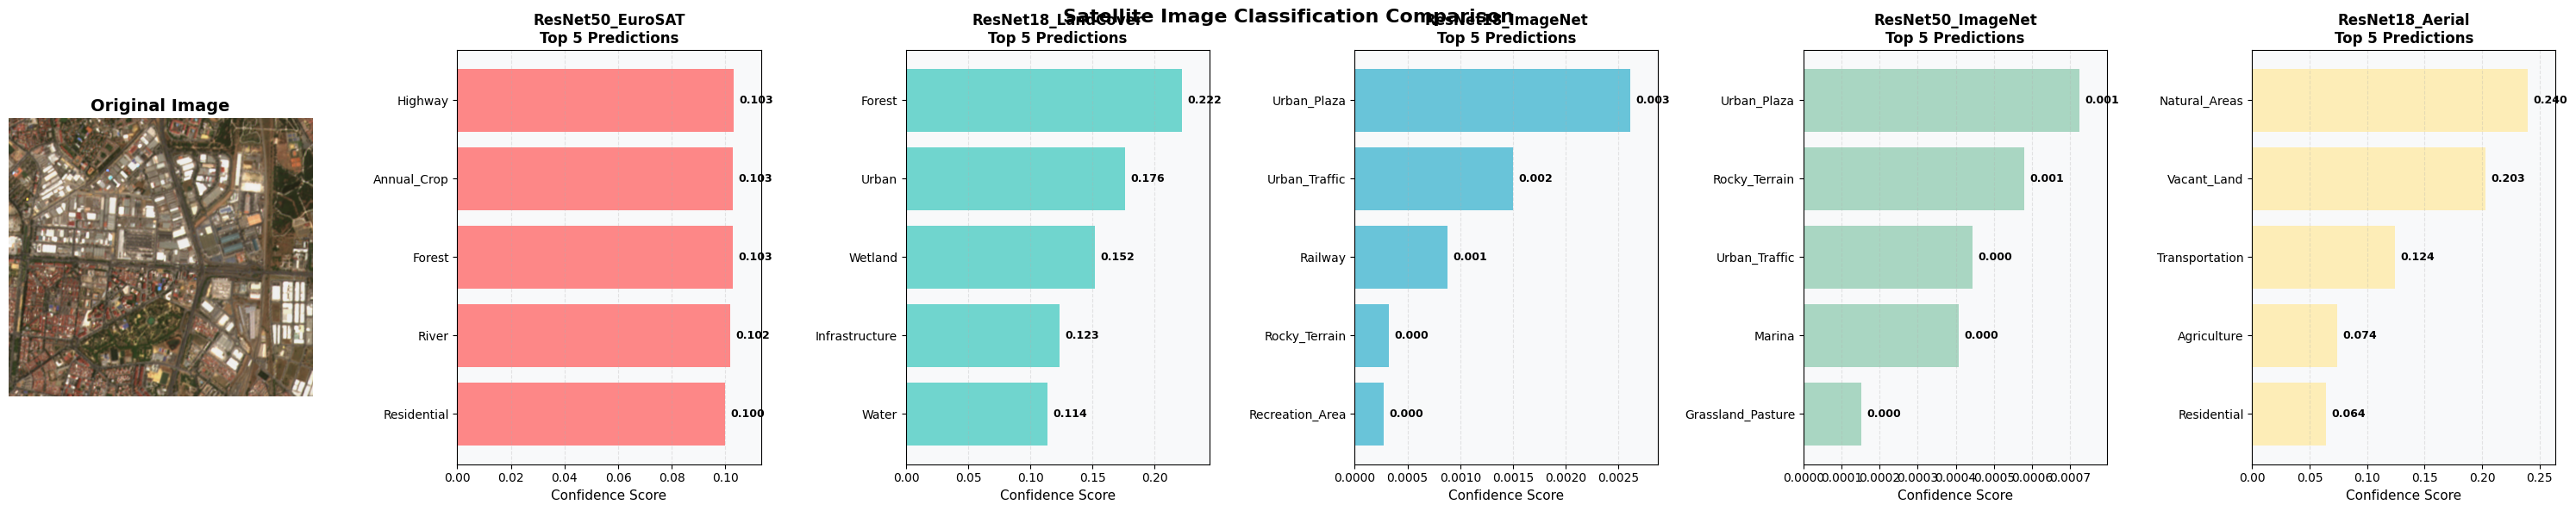

In [4]:
visualize_comparison(image_path, results, "Satellite Image Classification Comparison")

## Model Performance Summary

In [5]:
# Display detailed results for analysis
def print_detailed_results(results, image_name):
    """Print detailed classification results for analysis"""
    print(f"\n{'='*60}")
    print(f"DETAILED RESULTS FOR: {image_name}")
    print(f"{'='*60}")
    
    for model_name, result in results.items():
        print(f"\n🤖 {model_name}")
        print("-" * 40)
        
        if 'error' in result:
            print(f"❌ Error: {result['error']}")
            continue
            
        print(f"Number of classes: {result['num_classes']}")
        print("Top 5 predictions:")
        
        for i, pred in enumerate(result['predictions'][:5], 1):
            bar_length = int(pred['confidence'] * 30)
            confidence_bar = "█" * bar_length + "░" * (30 - bar_length)
            print(f"  {i}. {pred['class']:<25} {pred['confidence']:.4f} │{confidence_bar}│")

# Show detailed results for the first image
print_detailed_results(results, image_path)


DETAILED RESULTS FOR: images/test_4.png

🤖 ResNet50_EuroSAT
----------------------------------------
Number of classes: 10
Top 5 predictions:
  1. Highway                   0.1029 │███░░░░░░░░░░░░░░░░░░░░░░░░░░░│
  2. Annual_Crop               0.1027 │███░░░░░░░░░░░░░░░░░░░░░░░░░░░│
  3. Forest                    0.1026 │███░░░░░░░░░░░░░░░░░░░░░░░░░░░│
  4. River                     0.1018 │███░░░░░░░░░░░░░░░░░░░░░░░░░░░│
  5. Residential               0.0999 │██░░░░░░░░░░░░░░░░░░░░░░░░░░░░│

🤖 ResNet18_LandCover
----------------------------------------
Number of classes: 8
Top 5 predictions:
  1. Forest                    0.2219 │██████░░░░░░░░░░░░░░░░░░░░░░░░│
  2. Urban                     0.1762 │█████░░░░░░░░░░░░░░░░░░░░░░░░░│
  3. Wetland                   0.1515 │████░░░░░░░░░░░░░░░░░░░░░░░░░░│
  4. Infrastructure            0.1234 │███░░░░░░░░░░░░░░░░░░░░░░░░░░░│
  5. Water                     0.1139 │███░░░░░░░░░░░░░░░░░░░░░░░░░░░│

🤖 ResNet18_ImageNet
-----------------------